In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cal_df = pd.read_csv('demo_metrics/metrics-Caltech-video_2.csv').drop("Unnamed: 0", axis=1, errors='ignore')
base_df = pd.read_csv('demo_metrics/metrics-Base-video_2.csv').drop("Unnamed: 0", axis=1, errors='ignore')
ecp_df = pd.read_csv('demo_metrics/metrics-ECP-video_2.csv').drop("Unnamed: 0", axis=1, errors='ignore')

In [3]:
mean_std_base_df = (base_df.mean(), base_df.std())
mean_std_cal_df = (cal_df.mean(), cal_df.std())
mean_std_ecp_df = (ecp_df.mean(), ecp_df.std())

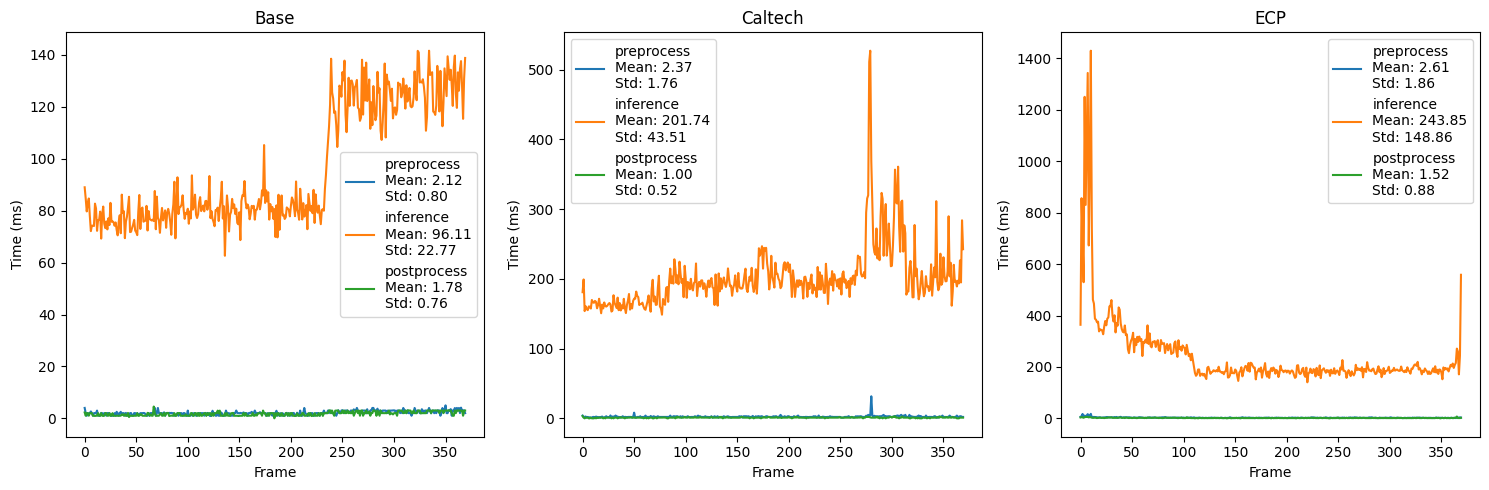

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the first DataFrame
base_df.plot(ax=axes[0], title='Base')
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Time (ms)')
axes[0].legend([f'{label}\nMean: {mean:.2f}\nStd: {std:.2f}' for label, mean, std in zip(base_df.columns, *mean_std_base_df)])

# Plot the second DataFrame
cal_df.plot(ax=axes[1], title='Caltech')
axes[1].set_xlabel('Frame')
axes[1].set_ylabel('Time (ms)')
axes[1].legend([f'{label}\nMean: {mean:.2f}\nStd: {std:.2f}' for label, mean, std in zip(cal_df.columns, *mean_std_cal_df)])

# Plot the third DataFrame
ecp_df.plot(ax=axes[2], title='ECP')
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Time (ms)')
axes[2].legend([f'{label}\nMean: {mean:.2f}\nStd: {std:.2f}' for label, mean, std in zip(ecp_df.columns, *mean_std_ecp_df)])

# Adjust layout
plt.tight_layout()

plt.savefig('demo_metrics/inference-performance-metrics.png')

# Show the plot
plt.show()

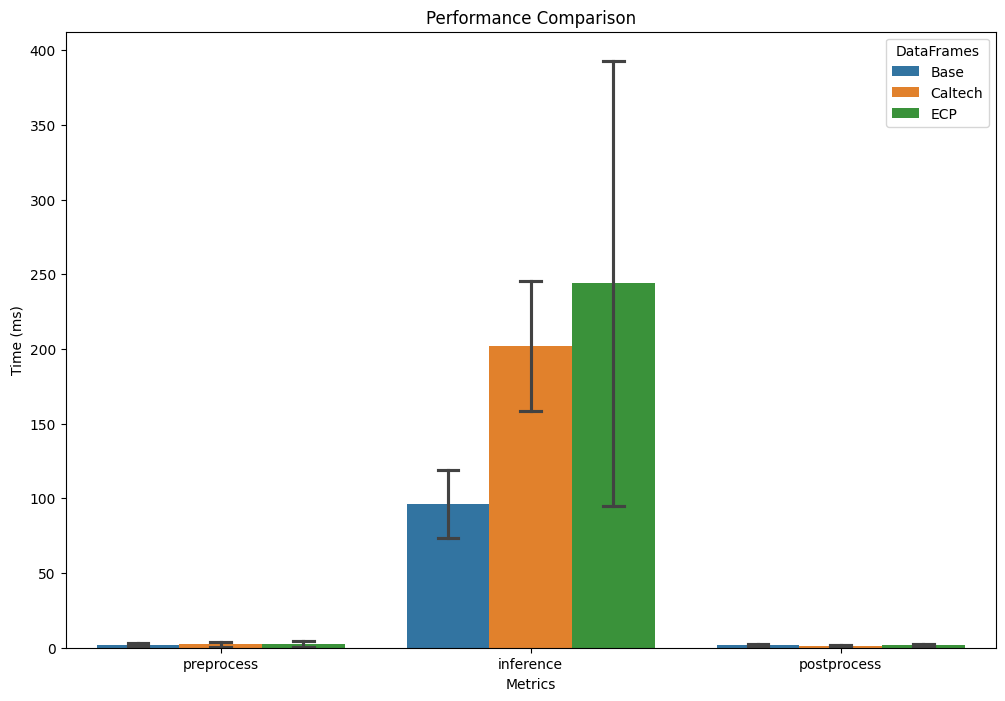

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1, df2, and df3 are your DataFrames
df1 = base_df
df2 = cal_df
df3 = ecp_df

# Combine the DataFrames into one for easier plotting
combined_df = pd.concat([df1, df2, df3], keys=['Base', 'Caltech', 'ECP'])

# Reset the index for proper grouping
combined_df.reset_index(inplace=True)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(combined_df, id_vars=['level_0'], var_name='Metric', value_name='Value')
melted_df = melted_df[melted_df['Metric'] != 'level_1']

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='level_0', data=melted_df, errorbar='sd', capsize=0.2)
plt.title('Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Time (ms)')
plt.legend(title='DataFrames')
plt.savefig('demo_metrics/inference-performance-compare.png')
plt.show()